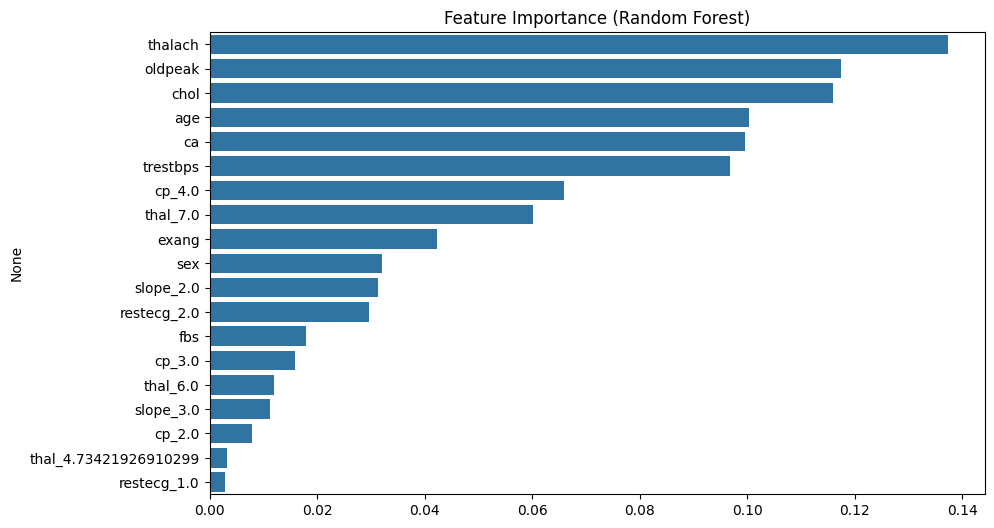

Selected features by RFE:
['sex', 'thalach', 'oldpeak', 'ca', 'cp_4.0', 'thal_7.0', 'slope_2.0', 'restecg_2.0']
Selected features by Chi-Square Test:
['exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'thal_7.0', 'slope_2.0']
✅ Reduced dataset saved at: data/selected_features.csv


In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 2. Load cleaned dataset (not PCA one, better to use cleaned.csv here)
df = pd.read_csv("../data/cleaned.csv")

X = df.drop("target", axis=1)
y = df["target"]

# 3. Feature Importance using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

# 4. Recursive Feature Elimination (RFE) with Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=8)  # choose top 8 features
rfe.fit(X, y)

print("Selected features by RFE:")
print(list(X.columns[rfe.support_]))

# 5. Chi-Square Test (requires non-negative features → use MinMaxScaler)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=8)  # top 8 features
X_kbest = chi2_selector.fit_transform(X_scaled, y)

selected_features = X.columns[chi2_selector.get_support()]
print("Selected features by Chi-Square Test:")
print(list(selected_features))

# 6. Save reduced dataset (based on top features from Random Forest for example)
top_features = feat_importances.head(10).index  # top 10 features
reduced_df = df[top_features.to_list() + ["target"]]

reduced_df.to_csv("../data/selected_features.csv", index=False)
print("✅ Reduced dataset saved at: data/selected_features.csv")
